<h1>Use of Samples of Different Classes of Iris Plants for Their Population Inference</h1>

<h2>Introduction</h2>

This group shall explore and analyse a dataset for the flower Iris for this project. The datasets contains 50 samples of three species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor). The following four features are given for each species: sepal length, sepal width, petal length, and petal width all in cm. We shall compare the sepal lengths for Iris Setosa and Iris Versicolor [1]. 
    
Precisely, the question we shall aim to answer is: <b>Does Iris Setosa have a different sepal length than Iris Versicolor?</b> 

The initial analysis revealed an approximately normally distributed sepal lengths for both samples, therefore the location parameter we have chosen is the sepal length mean and to analyze the variation in our parameter estimates, the scale parameter we have chosen is the standard deviation.

<h2>
Exploratory Data Analysis 
</h2>

In [1]:
# install.packages("infer")

In [2]:
# Load libraries
library(tidyverse)
library(repr)
library(scales)
library(broom)
library(infer)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
# Loading the Dataset and treat class as a factor
url = "https://raw.githubusercontent.com/fulleraltamiranoe/stat-201-project/main/iris.csv"
iris_data <- read_csv(url) %>% 
    mutate(class = as_factor(class))

Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): class
dbl (4): sepal_length, sepal_width, petal_length, petal_width

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Set seed to ensure reproducible randomness
set.seed(1001)

# Filter for class of interest (Iris-setosa)
iris_setosa_sample <- iris_data %>%
    filter(class == 'Iris-setosa') %>%
    select(sepal_length)

# Filter for class of interest (Iris-versicolor)
iris_versicolor_sample <- iris_data %>%
    filter(class == 'Iris-versicolor') %>%
    select(sepal_length)

# Point statistics of interest (sepal length mean, sd)
setosa_mean <- iris_setosa_sample %>%
    summarize(setosa_mean = mean(sepal_length), setosa_sd = sd(sepal_length))
# Point statistics of interest (sepal length mean, sd)
versicolor_mean <- iris_versicolor_sample %>%
    summarize(versicolor_mean = mean(sepal_length), versicolor_sd = sd(sepal_length))

# merging sample statistics of interest into a single tibble
sample_statistics <- merge(setosa_mean, versicolor_mean) %>%
    mutate(mean_diff = abs(setosa_mean - versicolor_mean))

<h4>Table 1: Sepal Lengths in cm of a Sample of 50 iris setosa plants</h4>

In [5]:
head(iris_setosa_sample)

# iris_data

sepal_length
<dbl>
5.1
4.9
4.7
4.6
5.0
5.4


<h4>Table 2: Sepal Lengths in cm of a Sample of 50 iris versicolor plants</h4>

In [6]:
head(iris_versicolor_sample)

sepal_length
<dbl>
7.0
6.4
6.9
5.5
6.5
5.7


<h4>Table 3: Sample Statistics of interest of 2 classes of iris plants (n = 50)</h4>

In [7]:
sample_statistics

setosa_mean,setosa_sd,versicolor_mean,versicolor_sd,mean_diff
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.006,0.3524897,5.936,0.5161711,0.93


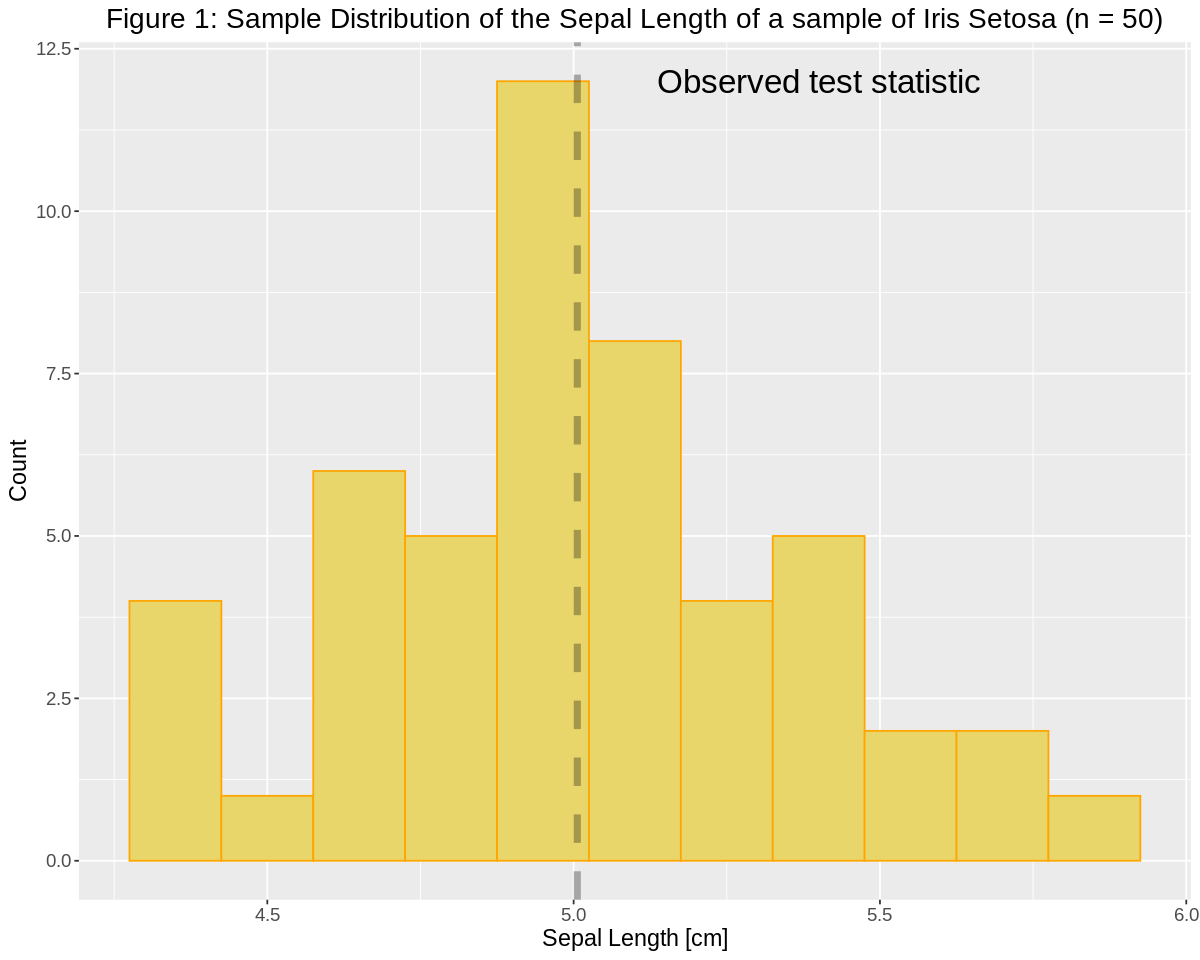

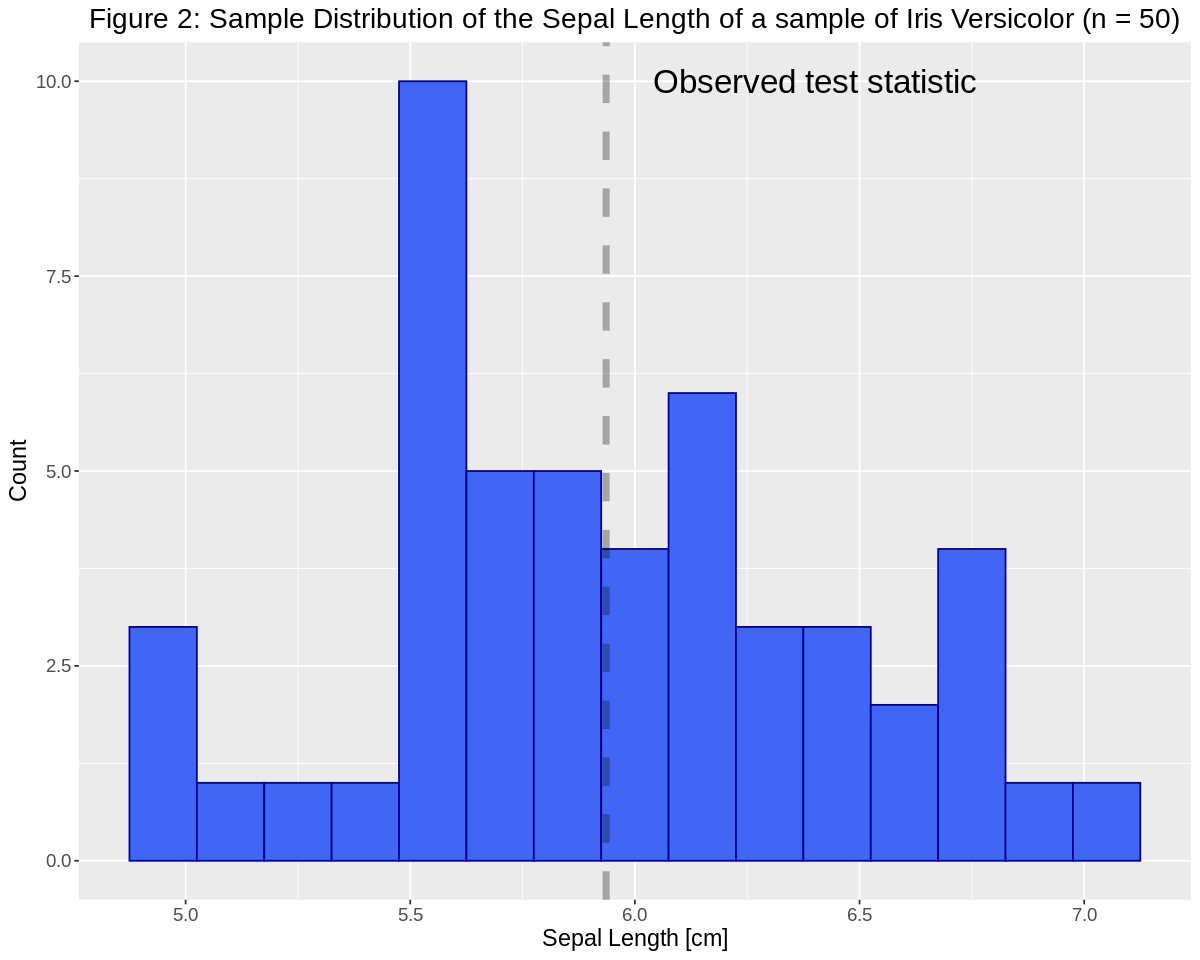

In [8]:
# Visualize Sample Distribution
options(repr.plot.width = 10, repr.plot.height = 8)
setosa_sample_dist <- iris_setosa_sample %>%
    ggplot(aes(x = sepal_length)) +
    geom_histogram(binwidth = 0.15, color="orange", fill="#E9D66B") +
    geom_vline(aes(xintercept = sample_statistics$setosa_mean),linetype="dashed", color = "black", alpha=.3, lwd=2) +
    labs(x = 'Sepal Length [cm]', y = 'Count') +
    ggtitle('Figure 1: Sample Distribution of the Sepal Length of a sample of Iris Setosa (n = 50)') +
    theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5)) +
    annotate("text", x = 5.4, y = 12, label = "Observed test statistic", color="black", size=7)
setosa_sample_dist

# Visualize Sample Distribution
options(repr.plot.width = 10, repr.plot.height = 8)
versicolor_sample_dist <- iris_versicolor_sample %>%
    ggplot(aes(x = sepal_length)) +
    geom_histogram(binwidth = 0.15, color="darkblue", fill="#4166F5") +
    geom_vline(aes(xintercept = sample_statistics$versicolor_mean), linetype="dashed", color = "black", alpha=.3, lwd=2) +
    labs(x = 'Sepal Length [cm]', y = 'Count') +
    ggtitle('Figure 2: Sample Distribution of the Sepal Length of a sample of Iris Versicolor (n = 50)') +
    theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5)) +
    annotate("text", x = 6.4, y = 10, label = "Observed test statistic", color="black", size=7) 
versicolor_sample_dist

<h2>
Methods
</h2>

In order to test our inferential question, we want to formulate a null hypothesis and an alternate hypothesis. Our null hypothesis states that the mean sepal length of Iris Setosa (i1) minus that of Iris Versicolor (i2) = 0, our alternate hypothesis then states that the mean sepal length of Iris Setosa minus that of Iris Versicolor is not equal to 0.
  

Ho -> i1 - i2 = 0 

H1 -> i1 - i2 != 0


To analyze if the null hypothesis is true, we would first look at the observed statistics, where we can calculate the mean sepal length of Iris Setosa minus that of Iris Versicolor. Further, we would generate samples from the null distribution and then calculate the results of the hypothesis test. Both steps can be done using the infer package in R. We can then plot the results of the hypothesis test and calculate a respective p-value. With this p-value, we would then be able to make a conclusion on whether we have enough evidence to reject the null hypothesis [2]. Moreover, as we analyze the implications of the p-value, comments on type I and type II errors can be made.


class,sample_mean,sample_sd
<fct>,<dbl>,<dbl>
Iris-setosa,5.006,0.3524897
Iris-versicolor,5.936,0.5161711
Iris-virginica,6.588,0.6358796


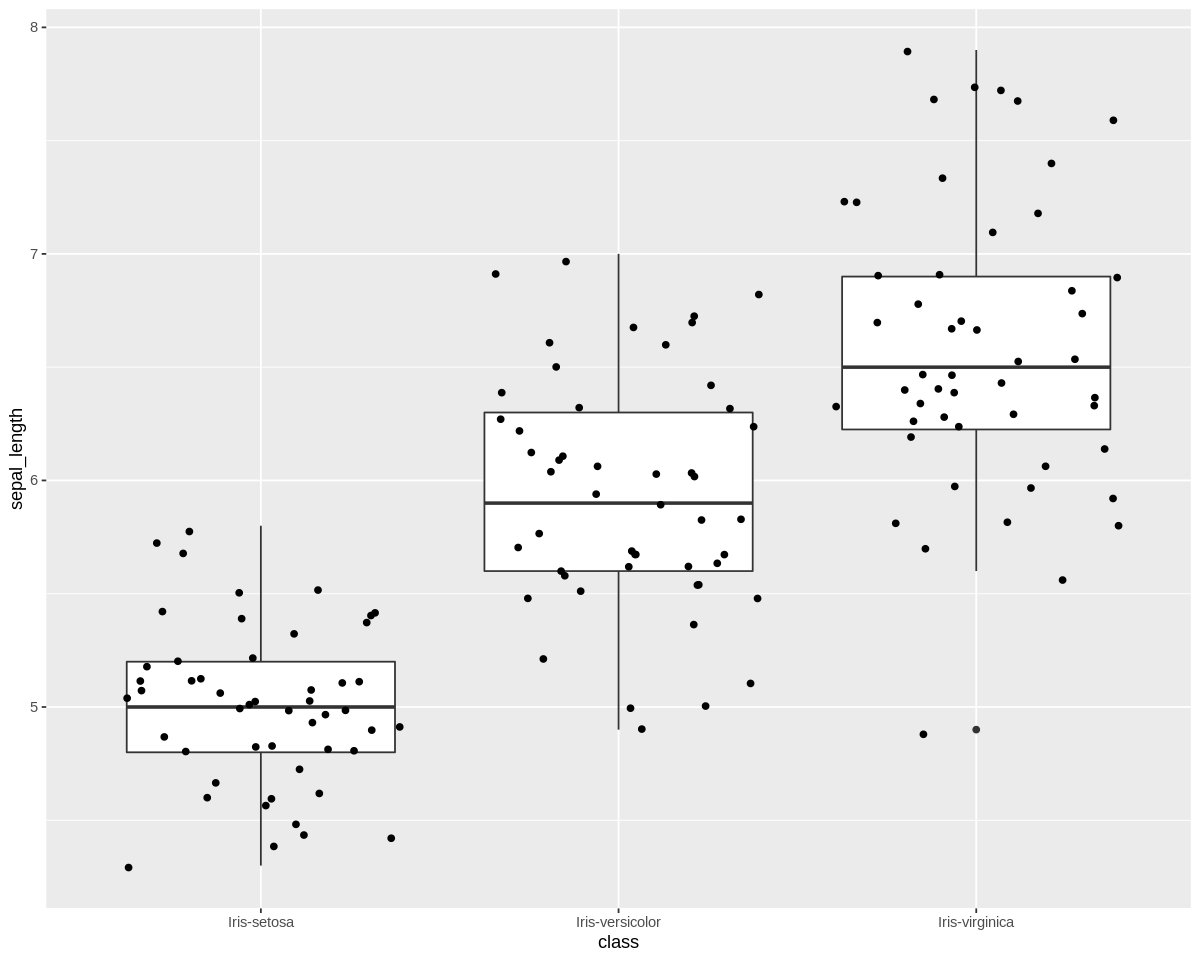

In [9]:
# testing some things, in terms of general data stuff

iris_data_test <- iris_data %>% 
select("sepal_length", "class") %>%
group_by(class) %>%
summarise(sample_mean = mean(sepal_length), 
          sample_sd = sd(sepal_length))

# rough plotting, jitter optional :)
iris_boxplot <- iris_data %>%
    ggplot(aes(x=class, y=sepal_length))+
    geom_boxplot()+
    geom_jitter()

iris_data_test
iris_boxplot

In [26]:
# some statistical tests

# iris_data_test

# math is based on some notes i had from STAT200

# ANOVA to see if they are all the same

anova_results <- aov(sepal_length~class, data=iris_data) %>% tidy()
f_stat = anova_results$statistic[1]
p_val=anova_results$p.value[1]

# anova_results
# f_stat
# p_val # very statistically significantly different

# conclusion so far: at least one of them is different

# next question: which one is different?
# test 1: setosa vs versicolor
setosa_mean = iris_data_test$sample_mean[1]
setosa_sd = iris_data_test$sample_sd[1]
versicolor_mean=iris_data_test$sample_mean[2]
versicolor_sd=iris_data_test$sample_sd[2]

t_1 = (setosa_mean-versicolor_mean)/sqrt((((setosa_sd)^2)/50)+(((versicolor_sd)^2)/50))
p_val1 = pt(t_1, df=49)*2 
# conclusion: setosa sepal != versicolor sepal at every confidence level we care about

# test 2: setosa vs virginica

virginica_mean=iris_data_test$sample_mean[3]
virginica_sd=iris_data_test$sample_sd[3]

t_2 = (setosa_mean-virginica_mean)/sqrt((((setosa_sd)^2)/50)+(((virginica_sd)^2)/50))
p_val2 = pt(t_2, df=49)*2 
# conclusion: setosa sepal != virginica sepal at every confidence level we care about

# test 3: versicolor vs virginica
t_3 = (versicolor_mean-virginica_mean)/sqrt((((versicolor_sd)^2)/50)+(((virginica_sd)^2)/50))
p_val3 = pt(t_3, df=49) *2
# conclusion: versicolor != verginica at any confidence level we care about

# p_val1
# p_val2
# p_val3

# OVERALL CONCLUSION: THEY ARE ALL DIFFERENT TO ANY REASONABLE CONFIDENCE LEVEL (by asymptotics i suppose)


# some random extra math thaty may or may not be useful, who knows, I certanily don't

# calculating the 95% confidence intervals for the means of sepal length, by boostrapping and quantiles
# BOOTSTRAP: size = 50, reps = 2000 (idk it's pretty arbitrary at the moment)

setosa_bootstrap <- iris_data %>%
    filter(class=="Iris-setosa") %>%
    rep_sample_n(size=50, reps=2000, replace = TRUE) %>%
    ungroup() %>%
    select(sepal_length)

versicolor_bootstrap <- iris_data %>%
    filter(class=="Iris-versicolor") %>%
    rep_sample_n(size=50, reps=2000, replace = TRUE) %>%
    ungroup() %>%
    select(sepal_length)

virginica_bootstrap <- iris_data %>%
    filter(class=="Iris-virginica") %>%
    rep_sample_n(size=50, reps=2000, replace = TRUE) %>%
    ungroup() %>%
    select(sepal_length)

setosa_bootstrap_ci <- setosa_bootstrap %>%
    summarize(lower_ci = quantile(sepal_length, 0.025),
              upper_ci = quantile(sepal_length, 0.975))

versicolor_bootstrap_ci <- versicolor_bootstrap %>%
    summarize(lower_ci = quantile(sepal_length, 0.025),
              upper_ci = quantile(sepal_length, 0.975))

virginica_bootstrap_ci <- virginica_bootstrap %>%
    summarize(lower_ci = quantile(sepal_length, 0.025),
              upper_ci = quantile(sepal_length, 0.975))


setosa_bootstrap_ci
versicolor_bootstrap_ci
virginica_bootstrap_ci

# 95% CI by asymptotics

sample_asymptotics_ci <- iris_data_test %>%
    mutate(upper_ci = sample_mean + 1.677*sample_sd/sqrt(50),
          lower_ci = sample_mean - 1.677*sample_sd/sqrt(50)) %>%
    select(class, upper_ci, lower_ci)

sample_asymptotics_ci

lower_ci,upper_ci
<dbl>,<dbl>
4.4,5.7


lower_ci,upper_ci
<dbl>,<dbl>
5,6.9


lower_ci,upper_ci
<dbl>,<dbl>
5.6,7.7


class,upper_ci,lower_ci
<fct>,<dbl>,<dbl>
Iris-setosa,5.089598,4.922402
Iris-versicolor,6.058417,5.813583
Iris-virginica,6.738808,6.437192


<h2>
Results
</h2>

The null hypothesis for the ANOVA test states that the sepals from the three different subspecies of Iris are the same. The F-statistic under the null-model is 119.26 which gives a p value of 1.67e-31. This suggests that at least one subspecies of Iris has a different average sepal length than the others at the 95% confidence level and we have sufficient evidence to  reject the null hypothesis. A series of 2 sample t-tests were performed to determine which pairs of plants are different. The null hypothesis for each of the t-tests is that the two species have the same sepal length. The p values for the comparison of I. setosa and I. versicolor, I. setosa and I. virginica, and I. versicolor and I. virginica, were 3.63e-14, 2.15e-14, and 8.68e-7, respectively; suggesting that the null hypothesis can be rejected and that all species have different sepal lengths at the 95% confidence level. 

<h2>
Discussion
</h2>

<h2>
References
</h2>
    
    

1. Fisher, R. A. The Use of Multiple Measurements in Taxonomic Problems. Annals of Human Genetics, 1936

2. Ismay, Chester, and Kim, Albert Y. Statistical Inference via Data Science: A ModernDive into R and the Tidyverse. ModernDive, 2022